<a href="https://colab.research.google.com/github/WanPgui/MLOP_Summative_Assignment/blob/main/Summative_assignment_MLOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flask

In [ ]:
from google.colab import files

# Upload files using the files upload method
uploaded = files.upload()

# Check the uploaded file's content
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving diabetic_data.csv to diabetic_data.csv
Uploaded file: diabetic_data.csv


In [ ]:
!ls -l /content/drive

total 8
drwx------ 6 root root 4096 Apr  1 16:47 MyDrive
drwx------ 2 root root 4096 Apr  1 16:47 Shareddrives


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('diabetic_data.csv')

# Show the first few rows of the DataFrame to check the structure
print("First 5 rows of the DataFrame:")
print(df.head())

# Show the columns in the DataFrame to check the features
print("\nColumns in the DataFrame:")
print(df.columns)


First 5 rows of the DataFrame:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

MODEL_PATH = "models/model.pkl"
DATA_PATH = "diabetic_data.csv"

# Create model directory
os.makedirs("models", exist_ok=True)

def load_and_preprocess_data(filepath=DATA_PATH):
    """Load and preprocess dataset."""
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Dataset {filepath} not found.")

    data = pd.read_csv(filepath)

    # Convert target variable to binary
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})

    # Drop unnecessary columns
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)

    y = data['diabetesMed']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def train_model():
    """Train and save a new model."""
    X_train, X_test, y_train, y_test = load_and_preprocess_data()

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    joblib.dump(model, MODEL_PATH)
    print("Model trained and saved.")

# Train the model
train_model()


Model trained and saved.


In [ ]:
ls -l /content/


total 18724
-rw-r--r-- 1 root root 19159383 Apr  1 16:52 diabetic_data.csv
drwx------ 7 root root     4096 Apr  1 16:47 drive/
drwxr-xr-x 2 root root     4096 Apr  1 16:53 models/
drwxr-xr-x 1 root root     4096 Mar 31 13:41 sample_data/


In [ ]:
pip install --upgrade cryptography


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 44.0.2 which is incompatible.


In [ ]:
import sqlite3
import pandas as pd

# Load the existing dataset
df = pd.read_csv('diabetic_data.csv')

# Create a SQLite connection
conn = sqlite3.connect('diabetic_data.db')

# Write the data into the SQLite database
df.to_sql('diabetic_data', conn, if_exists='replace', index=False)

# Verify the data is loaded
query = "SELECT * FROM diabetic_data LIMIT 5;"
df_from_db = pd.read_sql(query, conn)
print(df_from_db)


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
with open("app.py", "w") as f:
    f.write('''\
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

app = Flask(__name__)
MODEL_PATH = 'models/model.pkl'
DATA_PATH = "diabetic_data.csv"

@app.route('/')
def home():
    return jsonify({"message": "Flask app is running!"})

# Load or train the model
def load_model():
    global model
    if not os.path.exists(MODEL_PATH):
        print('Model not found! Training a new model...')
        train_model()
    model = joblib.load(MODEL_PATH)
    print('Model loaded successfully.')

# Load and preprocess data
def load_and_preprocess_data(filepath=DATA_PATH):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Dataset {filepath} not found.")

    data = pd.read_csv(filepath)
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)
    y = data['diabetesMed']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Train the model
def train_model():
    X_train, X_test, y_train, y_test = load_and_preprocess_data()
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    os.makedirs("models", exist_ok=True)
    joblib.dump(model, MODEL_PATH)
    print("Model trained and saved.")

# Ensure input features match the trained model
def preprocess_input(features):
    # Load the dataset to get the feature columns it expects
    data = pd.read_csv(DATA_PATH)
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)

    # Retrieve the feature columns used during training
    feature_columns = X.columns.tolist()

    # Convert the input features to a DataFrame
    feature_df = pd.DataFrame(features).T  # Convert to DataFrame

    # Add missing columns as 0 if they are not present in the input
    for col in feature_columns:
        if col not in feature_df.columns:
            feature_df[col] = 0  # Add missing columns with 0 value

    # Ensure the order matches the trained model
    feature_df = feature_df[feature_columns]

    return feature_df

# Model prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)

        # Preprocess the features before prediction
        features = preprocess_input(features)

        prediction = model.predict(features)
        return jsonify({'prediction': int(prediction[0])})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Retraining the model endpoint
@app.route('/retrain', methods=['POST'])
def retrain():
    try:
        train_model()
        load_model()
        return jsonify({'message': 'Model retrained successfully!'})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Visualizations
@app.route('/visualize', methods=['GET'])
def visualize():
    try:
        data = pd.read_csv(DATA_PATH)  # Load your dataset

        # Check if 'diabetesMed' is in your dataset
        if 'diabetesMed' not in data.columns:
            return jsonify({'error': "'diabetesMed' column not found in the dataset!"}), 400

        # Create the pairplot using seaborn
        sns.pairplot(data, hue="diabetesMed")

        # Save the plot to a file
        plt.savefig("visualization.png")
        plt.close()  # Close the plot to release memory

        return jsonify({"message": "Visualization saved!"})

    except Exception as e:
        return jsonify({'error': str(e)}), 500


# Upload data and retrain endpoint
@app.route('/upload', methods=['POST'])
def upload():
    try:
        file = request.files['file']
        if file and file.filename.endswith('.csv'):
            filepath = os.path.join('uploads', file.filename)
            file.save(filepath)

            # Load and preprocess the uploaded file data
            data = pd.read_csv(filepath)
            data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
            X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
            X = pd.get_dummies(X, drop_first=True)
            y = data['diabetesMed']

            # Retrain the model with the uploaded data
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X, y)
            os.makedirs("models", exist_ok=True)
            joblib.dump(model, MODEL_PATH)

            return jsonify({"message": "Model retrained with uploaded data!"})
        else:
            return jsonify({"error": "Invalid file format. Please upload a CSV file."})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    load_model()
    app.run(host='0.0.0.0', port=5005)
''')



In [ ]:
with open("app.py", "w") as f:
    f.write('''\
import os
import joblib
import pandas as pd
from flask import Flask, request, jsonify
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

app = Flask(__name__)

# Paths
MODEL_PATH = 'models/model.pkl'
DATA_PATH = "diabetic_data.csv"
DB_PATH = 'diabetic_data.db'

# Create a database connection function for SQLite
def get_db_connection():
    conn = sqlite3.connect(DB_PATH)
    conn.row_factory = sqlite3.Row
    return conn

# Load or train the model
def load_model():
    global model
    if not os.path.exists(MODEL_PATH):
        print('Model not found! Training a new model...')
        retrain_model()
    model = joblib.load(MODEL_PATH)
    print('Model loaded successfully.')

# Retrain the model with data from the database
def retrain_model():
    # Fetch data from SQLite database
    conn = get_db_connection()
    query = "SELECT * FROM diabetic_data"
    df = pd.read_sql(query, conn)

    # Preprocess data (age and weight handling)
    df['age'] = df['age'].map({
        '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3,
        '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7,
        '[80-90)': 8, '[90-100)': 9
    })
    df['weight'].replace('?', pd.NA, inplace=True)
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weight'].fillna(df['weight'].median(), inplace=True)
    df['diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})

    features = ['age', 'time_in_hospital', 'num_medications', 'A1Cresult', 'max_glu_serum', 'diabetesMed']
    X = df[features]
    X = pd.get_dummies(X, drop_first=True)
    y = df['diabetesMed']

    # Train and save the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    os.makedirs('models', exist_ok=True)
    joblib.dump(model, MODEL_PATH)
    print("Model retrained and saved.")

# Load and preprocess data from CSV
def load_and_preprocess_data(filepath=DATA_PATH):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Dataset {filepath} not found.")
    data = pd.read_csv(filepath)
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)
    y = data['diabetesMed']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Preprocess input features for prediction
def preprocess_input(features):
    data = pd.read_csv(DATA_PATH)
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)

    feature_columns = X.columns.tolist()
    feature_df = pd.DataFrame(features).T
    for col in feature_columns:
        if col not in feature_df.columns:
            feature_df[col] = 0
    feature_df = feature_df[feature_columns]
    return feature_df

# Visualizations
@app.route('/visualize', methods=['GET'])
def visualize():
    try:
        data = pd.read_csv(DATA_PATH)
        if 'diabetesMed' not in data.columns:
            return jsonify({'error': "'diabetesMed' column not found in the dataset!"}), 400
        sns.pairplot(data, hue="diabetesMed")
        plt.savefig("visualization.png")
        plt.close()
        return jsonify({"message": "Visualization saved!"})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Model prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()

        if 'features' in data:
            # Predict using the features from the input payload
            features = np.array(data['features']).reshape(1, -1)

            # Preprocess the features before prediction
            features = preprocess_input(features)
            prediction = model.predict(features)

        elif 'use_db' in data and data['use_db']:
            # Predict using data from the database
            conn = get_db_connection()
            query = "SELECT * FROM diabetic_data LIMIT 1;"  # Fetch one row from the database for testing
            df = pd.read_sql(query, conn)
            conn.close()

            # Preprocess the row (same as during training)
            df['age'] = df['age'].map({
                '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3,
                '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7,
                '[80-90)': 8, '[90-100)': 9
            })
            df['weight'].replace('?', pd.NA, inplace=True)
            df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
            df['weight'].fillna(df['weight'].median(), inplace=True)
            df['diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})

            features = ['age', 'time_in_hospital', 'num_medications', 'A1Cresult', 'max_glu_serum', 'diabetesMed']
            X = df[features]
            X = pd.get_dummies(X, drop_first=True)

            # Preprocess the features before prediction
            features = preprocess_input(X.values)
            prediction = model.predict(features)

        else:
            return jsonify({'error': 'Invalid data provided. Please provide either "features" or "use_db" parameter.'}), 400

        return jsonify({'prediction': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)}), 500


# Retraining the model endpoint
@app.route('/retrain', methods=['POST'])
def retrain():
    try:
        retrain_model()
        load_model()
        return jsonify({'message': 'Model retrained successfully!'})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

## Load and preprocess data from CSV
def load_and_preprocess_data(filepath=DATA_PATH):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Dataset {filepath} not found.")
    data = pd.read_csv(filepath)
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)
    y = data['diabetesMed']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Preprocess input features for prediction
def preprocess_input(features):
    data = pd.read_csv(DATA_PATH)
    data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
    X = data.drop(columns=['diabetesMed', 'encounter_id', 'patient_nbr'])
    X = pd.get_dummies(X, drop_first=True)

    feature_columns = X.columns.tolist()
    feature_df = pd.DataFrame(features).T
    for col in feature_columns:
        if col not in feature_df.columns:
            feature_df[col] = 0
    feature_df = feature_df[feature_columns]
    return feature_df

# Upload data and retrain model endpoint
@app.route('/upload', methods=['POST'])
def upload():
    try:
        file = request.files['file']

        # Check if the file has a valid extension and print its details
        if file and file.filename.endswith('.csv'):
            print(f"File received: {file.filename}")
            print(f"File content type: {file.content_type}")

            # Save the file to the uploads directory
            filepath = os.path.join('uploads', file.filename)
            file.save(filepath)

            # Try reading the file with pandas and catch any errors
            try:
                data = pd.read_csv(filepath, encoding='utf-8')
                print("File read successfully.")

                # Preprocess data
                data['age'] = data['age'].map({
                    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3,
                    '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7,
                    '[80-90)': 8, '[90-100)': 9
                })
                data['weight'].replace('?', pd.NA, inplace=True)
                data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
                data['weight'].fillna(data['weight'].median(), inplace=True)
                data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})

                # Ensure the required columns are present, otherwise assign default values (e.g., NaN or 0)
                required_columns = ['num_medications', 'A1Cresult', 'max_glu_serum']
                for col in required_columns:
                    if col not in data.columns:
                        data[col] = pd.NA  # or you can fill with default values like 0 or other placeholders

                features = ['age', 'time_in_hospital', 'num_medications', 'A1Cresult', 'max_glu_serum', 'diabetesMed']
                X = data[features]
                X = pd.get_dummies(X, drop_first=True)  # Ensure categorical features are properly handled
                y = data['diabetesMed']

                # Train and save the model
                model = RandomForestClassifier(n_estimators=100, random_state=42)
                model.fit(X, y)
                os.makedirs('models', exist_ok=True)
                joblib.dump(model, MODEL_PATH)

                return jsonify({"message": "Model retrained with uploaded data!"})

            except Exception as e:
                return jsonify({"error": f"Failed to read CSV file: {str(e)}"}), 400
        else:
            return jsonify({"error": "Invalid file format. Please upload a CSV file."}), 400

    except Exception as e:
        return jsonify({'error': str(e)}), 500


# Home route
@app.route('/')
def home():
    return jsonify({"message": "Flask app is running!"})

if __name__ == '__main__':
    load_model()
    app.run(host='0.0.0.0', port=5005)
''')



In [ ]:
!ls -l app.py


-rw-r--r-- 1 root root 9457 Apr  1 21:51 app.py


In [ ]:
!ps aux | grep flask


root       71119  0.0  0.0   7376  3452 ?        S    21:32   0:00 /bin/bash -c ps aux | grep flask
root       71121  0.0  0.0   6484  2364 ?        S    21:32   0:00 grep flask


In [ ]:
!pkill -f "python3 app.py"  # Stop existing Flask process
!nohup python3 app.py &     # Restart Flask in background


nohup: appending output to 'nohup.out'


In [ ]:
!ls


app.py		   diabetic_data.db  models	sample_data
diabetic_data.csv  drive	     nohup.out	visualization.png


In [ ]:
!lsof -i :5005


In [ ]:
pip install pyngrok

In [ ]:
!ngrok authtoken 2p5fON2Sy5SFPcehKCuAFGt8x9T_3x1PwjP3Uo2QbHQMJtDbj



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(5005)
print("Public URL:", public_url)



Public URL: NgrokTunnel: "https://67e5-34-106-234-182.ngrok-free.app" -> "http://localhost:5005"


In [ ]:
!ps aux | grep ngrok


root       54357  0.1  0.2 1254748 29888 ?       Sl   20:23   0:18 /root/.config/ngrok/ngrok start -
root       94273  0.0  0.0   7376  3520 ?        S    23:08   0:00 /bin/bash -c ps aux | grep ngrok
root       94275  0.0  0.0   6484  2388 ?        S    23:08   0:00 grep ngrok


In [ ]:
!kill -9 3763



In [ ]:
!tail -n 20 nohup.out


For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].replace('?', pd.NA, inplace=True)
/content/app.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(df['weight'].median(), inplace=True)
127.0.0.1 - - [01/Apr/2025 22:25:07] "POST /retrain HTTP/1.1" 200 -
Model loaded successfully.
 * Serving Flask app 'app'
 * Debug mode: off
 * 

In [ ]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv('diabetic_data.csv')

# Extract the last 10 rows
df_last_10 = df.tail(10)

# Save the last 10 rows to a new CSV file
df_last_10.to_csv('diabetic_data_last10.csv', index=False)

# Check the new CSV file
df_last_10


encounter_id  patient_nbr             race  gender      age weight  \
101756     443842070    140199494            Other  Female  [60-70)      ?   
101757     443842136    181593374        Caucasian  Female  [70-80)      ?   
101758     443842340    120975314        Caucasian  Female  [80-90)      ?   
101759     443842778     86472243        Caucasian    Male  [80-90)      ?   
101760     443847176     50375628  AfricanAmerican  Female  [60-70)      ?   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101756                  1                         1                    7   
101757                  1                         1                    7   
101758                  1                         1                    7   
101759                  1                         1                    7   
101760                  1                         1                    7   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
101756                 2  ...          No  Steady                   No   
101757                 5  ...          No  Steady                   No   
101758                 5  ...          No      Up                   No   
101759                 1  ...          No      Up                   No   
101760                 6  ...          No    Down                   No   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
101756                   No                        No   
101757                   No                        No   
101758                   No                        No   
101759                   No                        No   
101760                   No                        No   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
101756                       No                      No      No         Yes   
101757                       No                      No      No         Yes   
101758                       No                      No      Ch         Yes   
101759                       No                      No      Ch         Yes   
101760                       No                      No      Ch         Yes   
101761                       No                      No      Ch         Yes   
101762                       No                      No      No         Yes   
101763                       No                      No      Ch         Yes   
101764                       No                      No      Ch         Yes   
101765                       No                      No      No          No   


In [ ]:
import pandas as pd

# Example data - the last 10 rows you provided
data = {
    'encounter_id': [101756, 101757, 101758, 101759, 101760, 101761, 101762, 101763, 101764, 101765],
    'patient_nbr': [443842070, 443842136, 443842340, 443842778, 443847176, 443847548, 443847782, 443854148, 443857166, 443867222],
    'race': ['Other', 'Caucasian', 'Caucasian', 'Caucasian', 'AfricanAmerican', 'AfricanAmerican', 'AfricanAmerican', 'Caucasian', 'Caucasian', 'Caucasian'],
    'gender': ['Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': ['[60-70)', '[70-80)', '[80-90)', '[80-90)', '[60-70)', '[70-80)', '[80-90)', '[70-80)', '[80-90)', '[70-80)'],
    'weight': ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?'],
    'admission_type_id': [1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
    'discharge_disposition_id': [1, 1, 1, 1, 1, 3, 4, 1, 3, 1],
    'admission_source_id': [7, 7, 7, 7, 7, 7, 5, 7, 7, 7],
    'time_in_hospital': [2, 5, 5, 1, 6, 3, 5, 1, 10, 6],
    'citoglipton': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
    'insulin': ['Steady', 'Steady', 'Up', 'Up', 'Down', 'Down', 'Steady', 'Down', 'Up', 'No'],
    'diabetesMed': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
    'readmitted': ['>30', 'NO', 'NO', 'NO', '>30', '>30', 'NO', 'NO', 'NO', 'NO']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV file
df.to_csv('diabetic_data_last10.csv', index=False)


In [ ]:
files.download('diabetic_data_last10.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ls

app.py  diabetic_data.csv  diabetic_data_last10.csv  models/    sample_data/
C:/     diabetic_data.db   drive/                    nohup.out  visualization.png


In [ ]:
import os
import shutil

# Create the uploads directory if it doesn't exist
os.makedirs("uploads", exist_ok=True)

# Move the file
shutil.move("diabetic_data_last10.csv", "uploads/diabetic_data_last10.csv")

# Verify the move
print("Files in uploads folder:", os.listdir("uploads/"))


Files in uploads folder: ['diabetic_data_last10.csv']


In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('uploads/diabetic_data_last10.csv')

# Print the columns
print(data.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'citoglipton', 'insulin', 'diabetesMed',
       'readmitted'],
      dtype='object')


In [ ]:
import requests

# Set the URL of your Flask app
url = 'https://67e5-34-106-234-182.ngrok-free.app/upload'

# Open the file you want to upload
files = {'file': open('uploads/diabetic_data_last10.csv', 'rb')}

# Send a POST request with the file attached
response = requests.post(url, files=files)

# Close the file after uploading
files['file'].close()

# Print the response from the server
print(response.json())


{'message': 'Model retrained with uploaded data!'}


In [ ]:
print(model.feature_names_in_)


['age' 'time_in_hospital' 'diabetesMed']


In [ ]:
import pandas as pd

# Input data for prediction, keeping 'diabetesMed' as is
input_data = {
    'age': [30],  # Example age
    'time_in_hospital': [2],  # Example time in hospital
    'diabetesMed': ['Yes']  # Example diabetesMed
}

# Convert input data to DataFrame
df_input = pd.DataFrame(input_data)

# Convert 'diabetesMed' to numerical values
df_input['diabetesMed'] = df_input['diabetesMed'].map({'Yes': 1, 'No': 0})

# Ensure the columns match the training data
expected_columns = ['age', 'time_in_hospital', 'diabetesMed']

# Reindex the DataFrame to match the training columns
df_input = df_input.reindex(columns=expected_columns, fill_value=0)

# Make prediction
prediction = model.predict(df_input)
print(f"Prediction: {prediction[0]}")




Prediction: 1


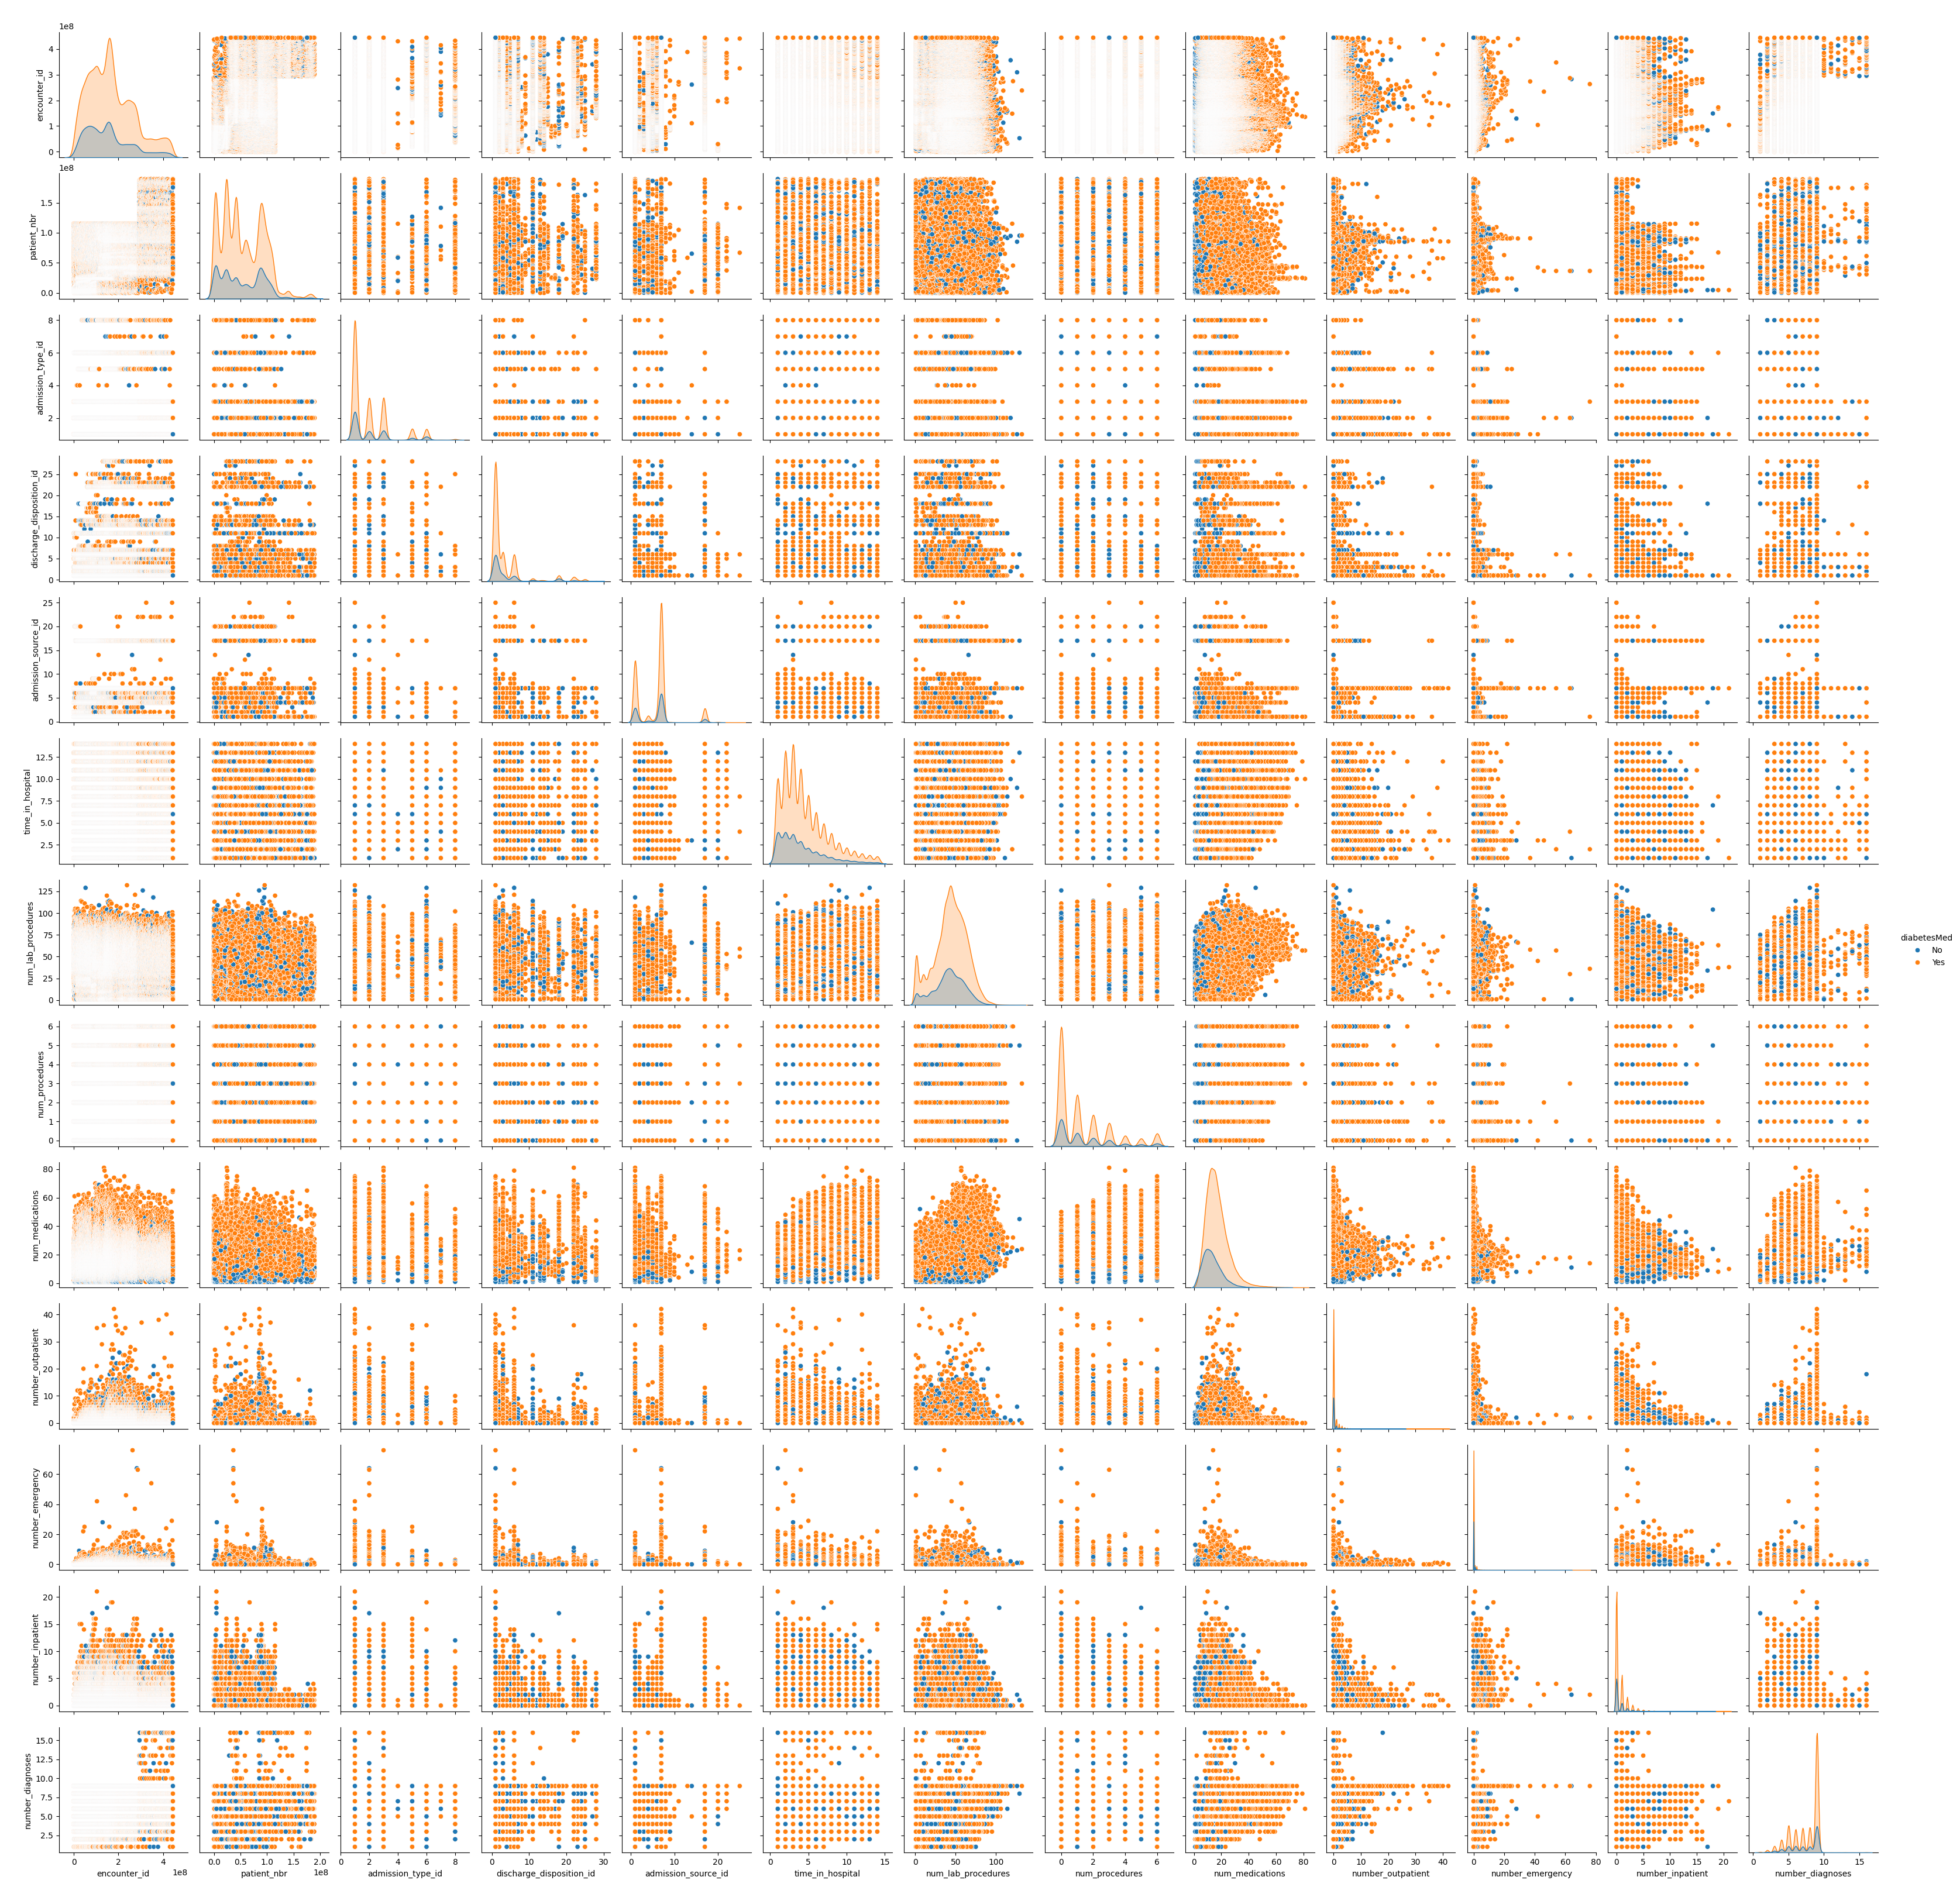

In [ ]:
from IPython.display import Image

# Display the image
Image(filename='visualization.png')


In [ ]:
pip install matplotlib seaborn


In [ ]:
# Create a Dockerfile in Google Colab
dockerfile_content = """
# Use an official Python runtime as a parent image
FROM python:3.9-slim

# Set the working directory in the container
WORKDIR /app

# Copy the current directory contents into the container at /app
COPY . /app

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Make port 80 available to the world outside this container
EXPOSE 80

# Run app.py when the container launches
CMD ["python", "app.py"]
"""

# Write the Dockerfile content to a file
with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)

print("Dockerfile created successfully!")

Dockerfile created successfully!


In [ ]:
from google.colab import files

# Download the Dockerfile
files.download('Dockerfile')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from locust import HttpUser, task, between
from concurrent.futures import ThreadPoolExecutor

class ModelLoadTest(HttpUser):
    wait_time = between(1, 3)  # Wait time between requests

    @task
    def test_prediction(self):
        features = {
            "features": [
                50,  # age
                1,   # sex_Male (assuming 1 for Male, 0 for Female)
                0,   # sex_Female
                1,   # race_Caucasian
                0,   # race_AfricanAmerican
                0,   # race_Other
                1,   # gender_Male
                0,   # gender_Female
                1,   # bp_low
                0,   # bp_normal
                0    # bp_high
            ]
        }

        # Perform the POST request to your Flask endpoint
        self.client.post("/predict", json=features)

    def on_start(self):
        """This function runs when a simulated user starts running."""
        self.executor = ThreadPoolExecutor(max_workers=10)  # Using threading instead of gevent


It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is be

RuntimeError: cannot release un-acquired lock

In [137]:
version: '3.8'
services:
  flask-app:
    build: .
    ports:
      - "5005:5005"
    volumes:
      - .:/app
    environment:
      - FLASK_APP=app.py
      - FLASK_RUN_HOST=0.0.0.0
    networks:
      - flask-network

networks:
  flask-network:
    driver: bridge


SyntaxError: invalid syntax (<ipython-input-137-749a1ae570e3>, line 2)